<a href="https://colab.research.google.com/github/niraj8763/Natuaral-Language-Processing/blob/master/Recurrent_Neural_Networks_LSTM_%7C_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,GRU,Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
# some fuction to help out with
def plot_prediction(test,predicted):
  plt.plot(test,color = 'red',label = 'Real IBM stock Price')
  plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
  plt.title('IBM Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('IBM Stock Price')
  plt.legend()
  plt.show()
def return_rmse(test,predicted):
  rmse = math.sqrt(mean_squared_error(test,predicted))
  print('the root mean squared error is is {}'.format(rmse))

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IBM_2006-01-01_to_2018-01-01.csv to IBM_2006-01-01_to_2018-01-01.csv
User uploaded file "IBM_2006-01-01_to_2018-01-01.csv" with length 153466 bytes


In [ ]:
#First we get the data
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

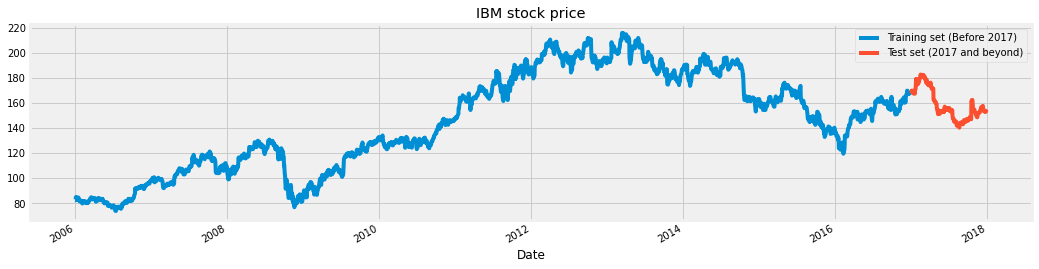

In [ ]:
# We have chosen 'High' attribute for prices.let's see what it looks like
dataset['High'][:'2016'].plot(figsize= (16,4),legend = True)
dataset['High']['2017'].plot(figsize = (16,4),legend = True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state , we create a data structure with
# 60 timesteps and 1 output
# so for each element of training set, we have 60 previous training set element
X_train = []
y_train = []
for i in range(60,2769):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modeling
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
2709/2709 [==============================] - 52s 19ms/step - loss: 0.0237
Epoch 2/50
2709/2709 [==============================] - 50s 18ms/step - loss: 0.0107
Epoch 3/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0084
Epoch 4/50
2709/2709 [==============================] - 50s 18ms/step - loss: 0.0072
Epoch 5/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0061
Epoch 6/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0055
Epoch 7/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0052
Epoch 8/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0046
Epoch 9/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0041
Epoch 10/50
2709/2709 [==============================] - 50s 18ms/step - loss: 0.0040
Epoch 11/50
2709/2709 [==============================] - 49s 18ms/step - loss: 0.0039
Epoch 12/50
2709/2709 [==============================] - 49s 18

In [ ]:
# take the test data set
dataset_total = pd.concat((dataset['High'][:'2016'],dataset['High']['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

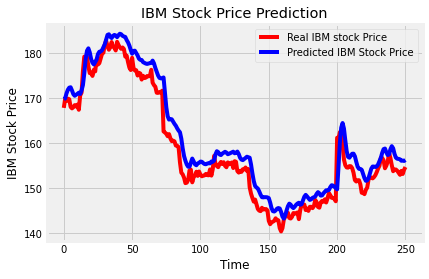

In [ ]:
# Visualising the results for LSTM
plot_prediction(test_set,predicted_stock_price)

In [ ]:
# Evaluate our model
return_rmse(test_set,predicted_stock_price)

the root mean squared error is is 3.3447140790478254


In [ ]:
# The GRU arichitecture
regressorGRU = Sequential()
# first GRU layer with Dropout regularization
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# second layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# third layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# the output layer
regressorGRU.add(Dense(units=1))

In [ ]:
# compiling the RNN
regressorGRU.compile(optimizer=SGD(lr = 0.01,decay = 1e-7,momentum=0.9,nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.1173
Epoch 2/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0419
Epoch 3/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0115
Epoch 4/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0048
Epoch 5/50
2709/2709 [==============================] - 15s 5ms/step - loss: 0.0041
Epoch 6/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0036
Epoch 7/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0037
Epoch 8/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0036
Epoch 9/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0033
Epoch 10/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0033
Epoch 11/50
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0034
Epoch 12/50
2709/2709 [==============================] - 14s 5ms/step - lo

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

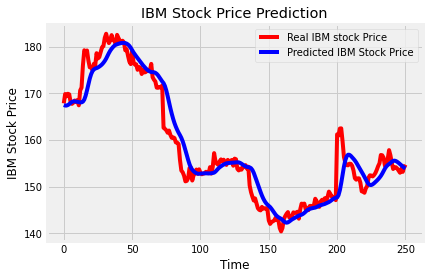

In [ ]:
# Visualizing the results for GRU
plot_prediction(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

the root mean squared error is is 3.2866034946987956


In [ ]:
# Preparing sequence data
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))


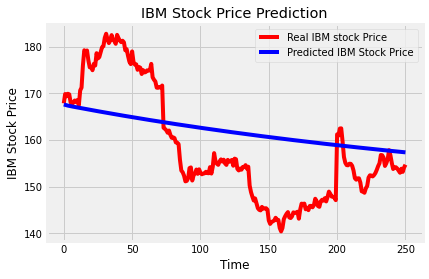

In [ ]:
# Visualizing the sequence
plot_prediction(test_set,sequence)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence)

the root mean squared error is is 10.60346192780355
